In [103]:
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import imageio
import numpy as np
import h5py
import random

In [92]:
colours = np.array([
    [199,191,193,128],  
    [0,0,0,0],
    [  0,   0, 254, 255],
    [ 50, 101, 254, 255],
    [127, 127,   0, 255],
    [254, 203,   0, 255],
    [254, 152,   0, 255],
    [254,   0,   0, 255],
    [254,   0, 254, 255],
    [229, 254, 254, 255]
])

In [75]:
train_df = pd.read_csv('train.csv')
train_df['timestamp'] = pd.to_datetime(train_df['Unnamed: 0'])
train_df = train_df.set_index('timestamp')
train_df = train_df[['level']]

In [81]:
f = h5py.File('images.h5','r')
train_images = f['train'][:]
f.close()

In [ ]:
train_df.level.plot()
plt.show()

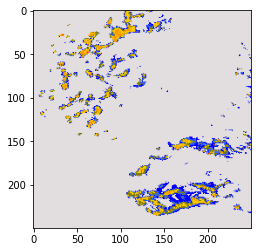

In [98]:
plt.imshow(colours[images[3777,:,:]])

In [115]:
raw_X = train_images.reshape(((9404, 250*250)))
raw_Y = train_df.level.values

print(raw_X.shape)
print(raw_Y.shape)

(9404, 62500)
(9404,)


In [148]:
parameters = {
    "batch_size": 100,
    "num_level_updates": 24*4,
    "num_steps": 60
}


def create_random_samples(raw_X, raw_Y, parameters, rain_threshold=0):
    # rain threshold should be a value from 0 to 40
    batch_size = parameters["batch_size"]
    num_level_updates = parameters["num_level_updates"]
    num_steps = parameters["num_steps"]

    X = []
    Y = []
    while len(X) < batch_size:
        i = random.randint(0, raw_X.shape[0] - num_steps)
        x = raw_X[i: i+num_steps]

        # This means we get fewer samples with no rain
        if np.sum(x) < rain_threshold:
            if random.randint(0, 10) > 4:
                continue


        y = raw_Y[i: i+num_steps]
        update_vector = np.zeros(num_steps)
        update_vector[0:num_level_updates] = 1

        x = np.column_stack([x, update_vector, update_vector*y])
        y = np.column_stack([y])

        X.append(x)
        Y.append(y)
    X = np.array(X)
    Y = np.array(Y)
    Y = Y[:,:,0]
    return X, Y

In [151]:
X, Y = create_random_samples(raw_X, raw_Y, parameters, rain_threshold=0)

In [152]:
print(X.shape)
print(Y.shape)

(100, 60, 62502)
(100, 60)


In [ ]:
# Might want to have architecture where feed in level value after the convolutional layer